# Sales Insights

We are going to analyze electronic sales data and find insights necessary for decision-making.

#### Import necessary libraries

In [2]:
import os
import pandas as pd

#### Read in updated dataframe

In [3]:
df = pd.read_csv(r"C:\Users\innoc\Downloads\all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape

(186850, 6)

In [5]:
# Find null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


It seems that all the columns have equal number of missing values. Columns like quantity, price and order data have the wrong data types.

### Clean the data

##### Drop rows of NAN

In [7]:
df = df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Get rid of text in order date column

In [9]:
df = df[df['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [10]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### Augment data with additional columns

#### Change Order Date to proper type

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 14.0+ MB


#### Add a month column

In [20]:
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [21]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [22]:
# We create a sales column first.

df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99


In [37]:
best_months = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
best_months

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

The best month was December, with earnings of $4,613,443.34

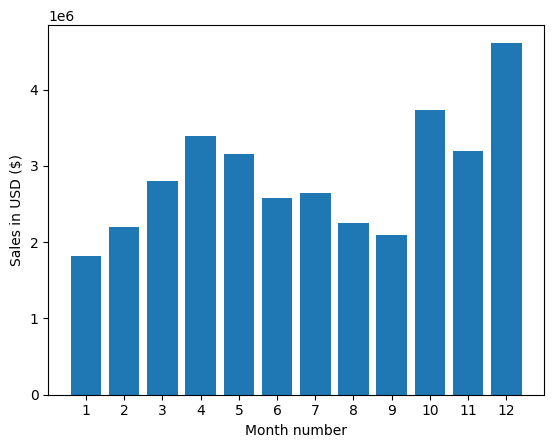

In [38]:
import matplotlib.pyplot as plt

plt.bar(best_months.index, best_months.values)
plt.xticks(best_months.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


It seems that sales went up in April and went down slightly up to September where they rose back up in October and the highest in December. Maybe sales in April were high due to better marketing and in December, people probably buy a lot of electronic gifts.

#### Question 2: What city sold the most product?

In [39]:
best_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
best_city

City
San Francisco  (CA)    8262203.91
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Boston  (MA)           3661642.01
Atlanta  (GA)          2795498.58
Dallas  (TX)           2767975.40
Seattle  (WA)          2747755.48
Portland  (OR)         1870732.34
Austin  (TX)           1819581.75
Portland  (ME)          449758.27
Name: Sales, dtype: float64

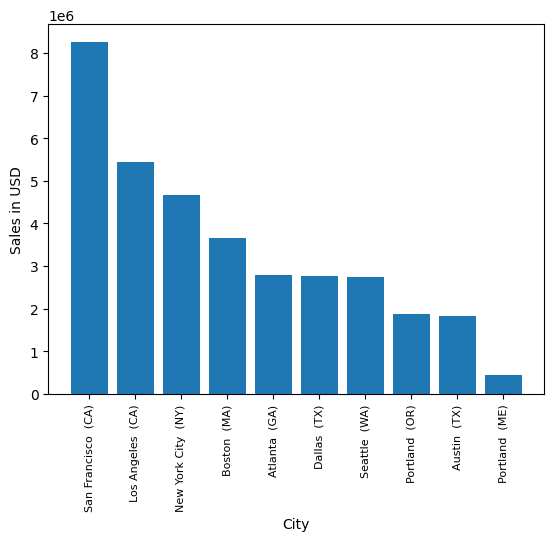

In [40]:
# Let's visualize cities and their earnings.

plt.bar(best_city.index, best_city.values)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.xticks(best_city.index, rotation='vertical', size=8)
plt.show()

San Francisco was the highest probably due to the presence of many big tech companies and people need more electronics.

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [41]:
# Add more time columns

df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


In [44]:
best_time = df.groupby('Hour')['Count'].count().sort_values(ascending=False)
best_time.head(3)

Hour
19    12905
12    12587
11    12411
Name: Count, dtype: int64

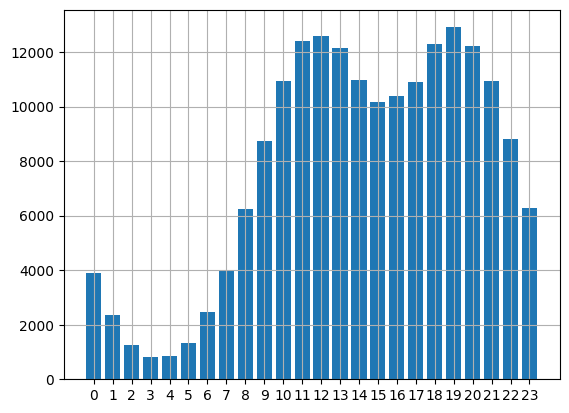

In [72]:
# Let's see what times have the most sales

plt.bar(best_time.index, best_time.values)
plt.xticks(best_time.index)
plt.grid()

From what we see, the best time is at 7pm and 12pm. This is probably because during these time people are off from work and taking a break/lunch or at home relaxing and using their phones. These times are recommended!

#### What product sold the most? Why do you think it sold the most?

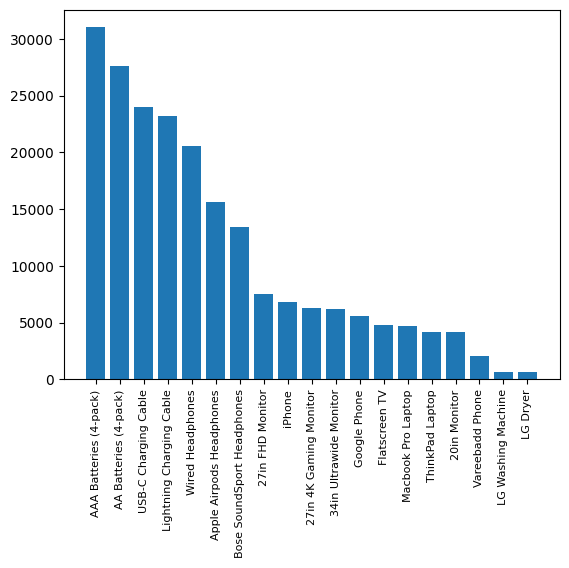

In [48]:
best_product = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.bar(best_product.index, best_product.values)
plt.xticks(best_product.index, rotation='vertical', size=8)
plt.show()

Considering that 'AAA Batteries (4-pack) are selling higher than macbooks and headphones, I will say that it's probably cheap and they tend to be replaced often due to damage or because they are not working well anymore.

** Let's try to prove it **

C:\Users\innoc\AppData\Local\Temp\ipykernel_115704\3939699944.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_product.index, rotation='vertical', size=8)
C:\Users\innoc\AppData\Local\Temp\ipykernel_115704\3939699944.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


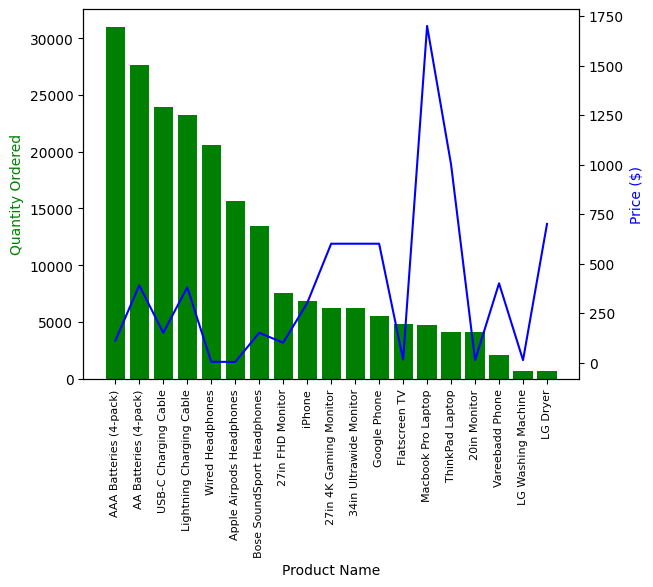

In [60]:
# We shall create a second y-axis for the average price per item

prices = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(best_product.index, best_product.values, color='g')
ax2.plot(prices.values, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(best_product.index, rotation='vertical', size=8)

fig.show()

This shows that the 'AAA Batteries (4-pack)' are cheap. And you could wonder why macbooks are selling more than the items after it even though it's more expensive, but we know that there's many people who buy macbooks for work and students, and thus are willing to pay more.